#### （1）矢量化加速

In [1]:
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
# 向量相加演示

n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [3]:
class Timer: #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start() # 创建对象时开始计时

    def start(self):
        """启动计时器"""
        self.tik = time.time() # 记录开始时间

    def stop(self):
        """停止计时，并把时间记录到列表中"""
        self.times.append(time.time() - self.tik) # 当前时间 - 开始时间
        return self.times[-1]

    def avg(self):
        """记录平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """记录总时间"""
        return sum(self.times)

    def cumsum(self):
        """返回累积时间"""
        return np.array(self.times).cumsum().tolist()
        
    

In [4]:
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.11413 sec'

In [5]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00032 sec'

#### (2) 正态分布与平方损失

* 正态分布概率密度函数：

  $$ p(x)=\frac{1}{\sqrt{2\pi \sigma^2}}exp(-\frac{1}{2\sigma^2}(x-\mu)^2) $$

In [6]:
def normal(x,mu,sigma):
    p = 1 / math.sqrt(2*math.pi*sigma**2)
    return p * np.exp(-0.5/sigma**2*(x-mu)**2)

* 可视化正态分布

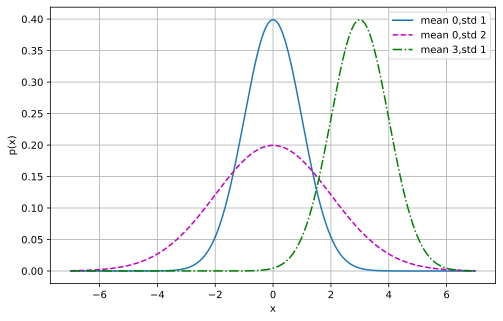

In [15]:
x = np.arange(-7,7,0.01)

# 均值与标准差对
params = [(0,1),(0,2),(3,1)]

d2l.plot(x,[normal(x,mu,sigma) for mu, sigma in params], xlabel='x',ylabel='p(x)', figsize = (8,5),
        legend=[f'mean {mu},std {sigma}' for mu, sigma in params])

#### （3）从零开始实现线性回归

* 导包

In [16]:
import random
import torch
from d2l import torch as d2l

* 人造数据集

In [19]:
# 生成一个包含1000个样本的数据集
# 每个样本包含从标准正态分布中采样的2个特征
# 采用线性模型参数W = [2,-3.4], b = 4.2 和噪声项epsilon来生成数据集
# 噪声项epsilin服从均值为0，标准差为0.01的正态分布

def synthetic_data(w,b,num_examples): #@save
    """生成y = wx + b+ 噪声 """
    X = torch.normal(0,1,(num_examples, len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

In [21]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)
print('features:',features[0:5],'\n label:',labels[0:5])

features: tensor([[ 0.8306, -1.7275],
        [-0.0406,  1.0931],
        [ 0.7369,  1.8195],
        [ 0.5423,  0.3899],
        [ 0.5183,  0.6902]]) 
 label: tensor([[11.7361],
        [ 0.4012],
        [-0.5000],
        [ 3.9600],
        [ 2.9016]])


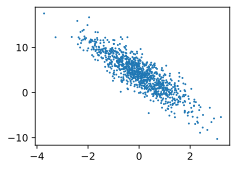

In [24]:
# 绘制散点图，观察线性特征

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)